In [97]:
import warnings
warnings.filterwarnings("ignore") 

import torch
import torch.nn as nn
from sklearn import datasets,preprocessing

import matplotlib
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from random import seed,randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

from torch.autograd import Variable
import torch.optim as optim
from pylab import plot, show, grid, xlabel, ylabel

# Написать на PyTorch forward и backward полносвязного слоя без использования autograd

In [118]:
class FNN(nn.Module):
    def __init__(self, ):
        super().__init__()

        # Размеры
        self.input_dim = 2
        self.hidden_dim = 32
        self.output_dim = 1

        # шаг обучения
        self.learning_rate = 0.001

        # Веса
        # 2 x 32
        self.w1 = torch.randn(self.input_dim, self.hidden_dim)

        # 32 x 1
        self.w2 = torch.randn(self.hidden_dim, self.output_dim)

    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def sigmoid_first_order_derivative(self, s):
        return s * (1 - s)

    def forward(self, X):
        # Первый линейный слой
        self.y1 = torch.matmul(X, self.w1) 

        # Первый нелинейный 
        self.y2 = self.sigmoid(self.y1)

        # Второй линейный слой
        self.y3 = torch.matmul(self.y2, self.w2)

        # Второй нелинейный 
        y4 = self.sigmoid(self.y3)
        return y4

    def backward(self, X, l, y4):
        #---
        self.dC_dy4 = y4 - l
        self.dy4_dy3 = self.sigmoid_first_order_derivative(y4)
        self.dy3_dw2 = self.y2
        #---
        self.dy3_dy2 = self.w2
        self.dy2_dy1 = self.sigmoid_first_order_derivative(self.y2)
        #---
        self.y4_delta = self.dC_dy4 * self.dy4_dy3
        self.y2_delta = torch.matmul(self.y4_delta, torch.t(self.dy3_dy2)) * self.dy2_dy1
        #---
        self.dC_dw1 = torch.matmul(torch.t(X), self.y2_delta)
        self.dC_dw2 = torch.matmul(torch.t(self.dy3_dw2), self.y4_delta)
        #---
        self.w1 -= self.learning_rate * self.dC_dw1
        self.w2 -= self.learning_rate * self.dC_dw2

    def train(self, X, l):
        y4 = self.forward(X)
        self.backward(X, l, y4)

In [116]:
iris = datasets.load_iris()
X = torch.tensor(preprocessing.normalize(iris.data[:, :2]), dtype=torch.float)
y = torch.tensor(iris.target.reshape(-1, 1), dtype=torch.float)

print(X.size())
print(y.size())

# Мы берем только 2 класса, чтобы решить задачу бинарной классификации
X = X[:y[y < 2].size()[0]]
y = y[:y[y < 2].size()[0]]

print(X.size())
print(y.size())

torch.Size([150, 2])
torch.Size([150, 1])
torch.Size([100, 2])
torch.Size([100, 1])


In [119]:
model = FNN()

loss_lst = []

num_epochs = 10001

for epoch in range(num_epochs):
    y_hat = model(X)

    cross_entropy_loss = -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))
    mean_cross_entropy_loss = torch.mean(cross_entropy_loss).detach().item()

    if epoch % 2000 == 0:
        print('Epoch {} | Loss: {}'.format(epoch, mean_cross_entropy_loss))
    loss_lst.append(mean_cross_entropy_loss)

    model.train(X, y)

Epoch 0 | Loss: 1.5593029260635376
Epoch 2000 | Loss: 0.5018343925476074
Epoch 4000 | Loss: 0.3694289028644562
Epoch 6000 | Loss: 0.28234097361564636
Epoch 8000 | Loss: 0.2291002869606018
Epoch 10000 | Loss: 0.19501298666000366


# Написать 1-2 адаптивных оптимизатора

In [75]:
# Загружаем тестовые данные

X = load_boston().data
Y = load_boston().target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5


In [120]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13) 
    b = np.random.randn(1,1)   
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
        
        if epoch % 200 == 0:
            print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b


def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [ ]:
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

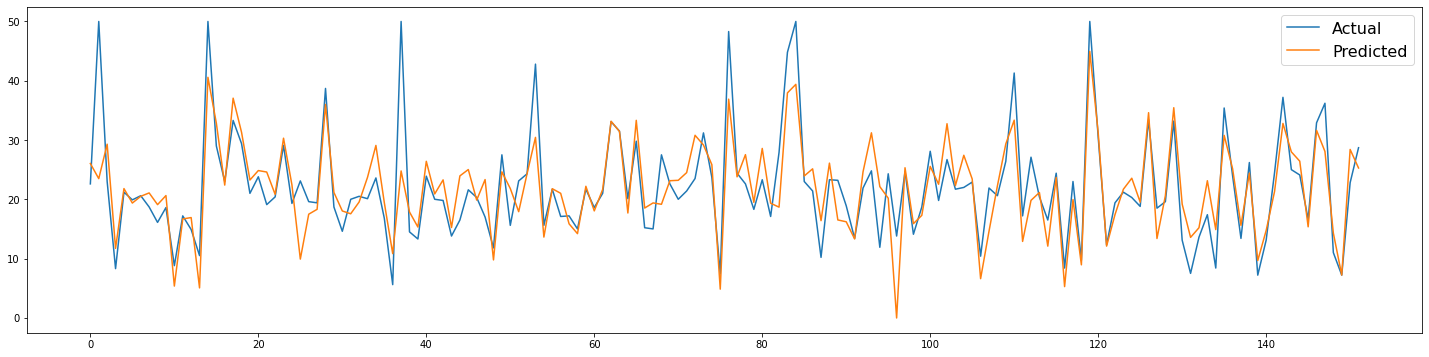

Mean Squared Error : 27.70918207249097


In [122]:
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

# выглядит похоже :)

# Решить задачу нахождения корней квадратного уравнения методом градиентного спуска

In [123]:
def f_x(x):
    return x * x / 64 - 5 * x / 4 + 25


def build_dataset():
    x_values = np.ones((21, 1))
    for i in range(0, 21):
        x_values[i] = i + 30  # True
    return x_values


def train():
    net.train()
    losses = []
    for epoch in range(1, epochs):
        x_train = Variable(torch.from_numpy(x_values)).float()
        y_train = f_x(x_train)
        y_pred = net(x_train)
        loss = torch.sum(torch.abs(y_pred - y_train))
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses


def out(k):
    a = 30
    b = 50

    t = np.linspace(a, b, 20)
    x = np.zeros(t.shape[0])
    c_fig = plt.figure()

    for j in range(len(t)):
        h = torch.tensor(np.ones(1) * t[j], dtype=torch.float32)
        x[j] = net(h)
    plt.ylim([0, 1])
    plot(t, x, linewidth=4)
    xlabel('x', fontsize=16)
    ylabel('net(x)', fontsize=16)
    grid(True)
    show()
    plt.close(c_fig)

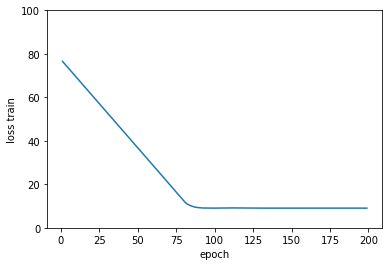

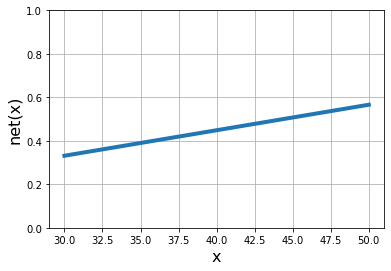

In [128]:
x_values = build_dataset()

net = nn.Sequential(
    nn.Linear(1, 100), 
    nn.ReLU(), 
    nn.Linear(100, 100), 
    nn.ReLU(), 
    nn.Linear(100, 1))

optimizer = optim.Adam(net.parameters(), lr=0.00001)
epochs = 200

losses = train()
plt.plot(range(1, epochs), losses)
plt.xlabel("epoch")
plt.ylabel("loss train")
plt.ylim([0, 100])
plt.show()

out(epochs)